# Spooky Author Prediction 
(https://www.kaggle.com/c/spooky-author-identification/data)

Authors: `Héctor Laria Mantecón (662134)`, `Aditya Kaushik (662862)`, `Maximilian Andreas Peter Proll (662529)`

Repo: https://github.com/akskuchi/nlp-mini-project/

_____________________________________
### 1. Data and Problem

- **Dataset description**:

The dataset contains text from works of fiction written by spooky authors of the public domain: `Edgar Allan Poe`, `HP Lovecraft` and `Mary Shelley`

- **Problem statement**:

Given the training dataset, objective is to design a model that accurately predicts the author of the sentences for the validation dataset unused during training

________________________________________
### 2. Exploratory Data Analysis

**a) Load and check train data**

![title](data_head.png)

**b) Count author frequencies (category frequency / influence) in the dataset**

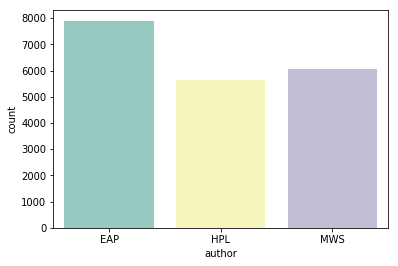

In [3]:
sns.countplot('author', data = train_data, palette="Set3")

As it does not make sense to do any further exploratory data analysis without pre-processing, we decided to move to `step-3` and revist `step-2` later.

**c) Zip's Law (uses `train_features`)**: Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table - [zipf-law](http://www.geoffkirby.co.uk/ZlPFSLAW.pdf)

![zipf](zipf.png)

From the above plot we inferred that for the dataset in context, the occurance of the uncommon words dominates the overall corpus. This could possibly be because of the spooky style literature

_We used 'pandas' for retrieving the word frequencies and ranking them and eventually fed this data to polyfit function ('matplotlib') that fits a line to the data_

________________________________

### 3. Data Preprocessing

We have used the **pre-processing techniques** used throughout the course of the study group

- tokenize sentences
- remove stopwords
- remove numbers
- convert to lowercase
- lemmatizing (instead of `stemming`, as we had enough resources to cope with)

**Vectorizing using tf-idf vectorizer**: We scored the words using tf-idf instead of simple count-vectorizing, to take into consideration importance of tokens that relate the sentence to its author at the core

**Splitting the data into train and validation sets**: Because we did not have any explicit test data from the `Kaggle` competition dataset, we decided to split the training data into $90\%$ training and $10\%$ validation sets

_For the purpose of data preprocessing, we used the following libraries:_
- _NLTK_
- _SKLEARN_

______________________________

### Approaches

**a) Motivation**: Though our objective was essentially text classification, we discussed to experiment a bit with the representation/format of the dataset before trying out various classification methods

**b) Methods**:

* Logistic Regression (with tf-idf vectors): It was a convenient goto method for our problem at hand as it had support for multi-class classification (`one-vs-rest`, `one-vs-one`)

* Naive-Bayes (with tf-idf vectors): Similar motivation as logistic regression and the fact that it is computationally less expensive

* Deep Neural Network (using bag-of-words): A simple two fully connected non-linear layers (`relu` activations) and an eventual `softmax` for the output layer

* Logistic Regression (with sent2vec): Because tf-idf was failing to capture the subtleties between the words of the sentences of different classes, we decided to try out sentence embeddings - [sent2vec](https://github.com/epfml/sent2vec). We used the `torontobooks_bigrams.bin` pre-trained embeddings model

* Support Vector Machines (with sent2vec): To try out performance of other classifiers on the same set of embeddings

* Deep Recurrent Neural Network (using bag-of-words): The vanilla classifiers were not yielding desired resutls and that formed the motivation for using sequence models that can make use of previous-state to model relations between the sentences

* Deep Recurrent Neural Network (using `GloVe` embeddings, batch training): Because the plain RNN above-mentioned was computationally expensive, we wanted to reduce the dimensionality of the sentence representations. We made use of a simple LSTM layer along with two dense (fully connected) layers with respective empirical dropout values. We used pre-trained `GloVe` word-embeddings trained on book-corpus as it falls in the realm of our dataset context

* Convolutional Neural Network (using `GloVe` embeddings, batch training): We stumbled upon this intriguing way of classification while reading about RNNs and evaluated its performance on the dataset - [post](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html), [publication](http://www.aclweb.org/anthology/D14-1181). Though we did not analyze on why and how things worked on this architecture, we thought it would be fair to atleast report the results

______________________________________
### 5. Experimental Results

All the source code and respective labelling can be found in the following notebooks:

- `nlp-project.ipynb`
- `project-nlp.ipynb`
- `CNN_pytorch.ipynb`

Metrics used:

- Log-Loss / Categorical cross-entropy was used in the competition


|                   approach                   | loss (mean) | accuracy (%)  |
| :------------------------------------------: | :---------: | :-----------: |
| CNN (using GloVe embeddings, batch training) |    0.80     |     73.60     |
| RNN (using GloVe embeddings, batch training) |    0.49     |     **81.56** |
|               RNN (using BOWs)               |    0.62     |      N/A      |
|             SVM (with sent2vec)              |    0.70     |      N/A      |
|     Logistic Regression (with sent2vec)      |    0.78     |      N/A      |
|         Feed Forward NN (using BOWs)         |    0.47     |      N/A      |
|      Naive-Bayes (with tf-idf vectors)       |    0.59     |      N/A      |
|  Logistic Regression (with tf-idf vectors)   |    0.61     |      N/A      ||        

___________________________________________________

### 6. Conclusions

From the results above it is evident that the RNNs outperformed other methods, both in terms of accuracy and consistency. We tried working towards grid-searching and tuning the parameter space of the network for further improving it. We figured that implementation was less of a husstle by using `keras` instead of `PyTorch` for RNNs.

The better performance of this kind of model can be explained as 1) `GloVe` embeddings retain and project overall relations of the whole sentence, while `BOW` or `word2vec` cannot really grasp them. This makes them a good input suite for learning networks, and 2) nature of the RNN, as explained in section 4.

We were able to use many concepts pursued as a part of the study group and also experiment and learn a few more. This project has motivated us to get involved with and tackle further challenges related to text-summarization and classification problems. We had access to resources from `panikki` (_QP5000 GPU_) and was ample for the load of our dataset.